In [16]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import Adagrad
import matplotlib.pyplot as plt

In [17]:
seed = 11
numpy.random.seed(seed)

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]

In [19]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [20]:
def baseline_model():
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(450, kernel_initializer='normal', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
	adagrad = Adagrad(lr=0.02, epsilon=None, decay=0.0)
	#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.01, nesterov=True)
	return model

In [21]:
model = baseline_model()

In [22]:
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=2)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 44s - loss: 0.1981 - acc: 0.9428 - val_loss: 0.0934 - val_acc: 0.9707
Epoch 2/10
 - 41s - loss: 0.0823 - acc: 0.9755 - val_loss: 0.0760 - val_acc: 0.9760
Epoch 3/10
 - 44s - loss: 0.0557 - acc: 0.9837 - val_loss: 0.0685 - val_acc: 0.9779
Epoch 4/10
 - 46s - loss: 0.0418 - acc: 0.9880 - val_loss: 0.0634 - val_acc: 0.9800
Epoch 5/10
 - 42s - loss: 0.0317 - acc: 0.9911 - val_loss: 0.0595 - val_acc: 0.9813
Epoch 6/10
 - 43s - loss: 0.0251 - acc: 0.9931 - val_loss: 0.0577 - val_acc: 0.9830
Epoch 7/10
 - 47s - loss: 0.0195 - acc: 0.9947 - val_loss: 0.0561 - val_acc: 0.9836
Epoch 8/10
 - 43s - loss: 0.0158 - acc: 0.9959 - val_loss: 0.0576 - val_acc: 0.9832
Epoch 9/10
 - 45s - loss: 0.0126 - acc: 0.9971 - val_loss: 0.0587 - val_acc: 0.9844
Epoch 10/10
 - 40s - loss: 0.0102 - acc: 0.9977 - val_loss: 0.0575 - val_acc: 0.9843


In [29]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Test accuracy: %.2f%%" % (scores[1]*100))

Baseline Error: 1.57%
Test accuracy: 98.43%


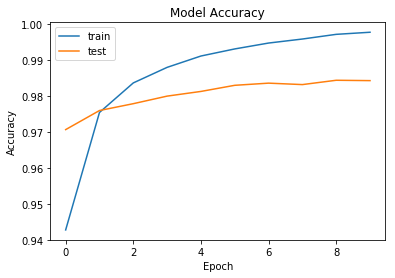

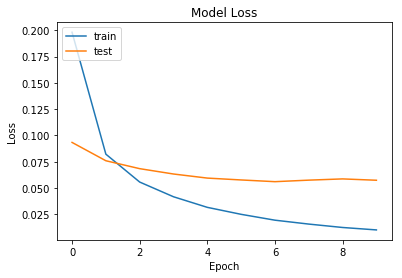

In [24]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 450)               353250    
_________________________________________________________________
dropout_2 (Dropout)          (None, 450)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                4510      
Total params: 973,200
Trainable params: 973,200
Non-trainable params: 0
_________________________________________________________________
